In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = './data/normalized_proteomics_pivot.csv'
data_file = './data/normalized_proteomics_pivot_c0-c6.csv'
omics = pd.read_csv(data_file, index_col=0)
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


### Drop wierd runs from C3

In [3]:
omics = omics.drop(['PP_0815_PP_1317-R1_c3',
                    'PP_0815_PP_1317-R2_c3',
                    'PP_0815_PP_1317-R3_c3',
                    'PP_1317-R1_c3',
                    'PP_1317-R2_c3',
                    'PP_1317-R3_c3'
                   ]
                  )

## Merge means by replicate

### Drop rows/columns with missing data

In [4]:
omics.loc[omics['isoprenol'].isna(), 'isoprenol']
omics = omics.dropna(axis = 0, how = 'any', subset=['isoprenol'])
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


In [5]:
omics = omics.dropna(axis = 1, how = 'any')
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


### Merge by replicate

In [6]:
omics_mean = omics.copy()
omics_mean['cycle'] = [x[-1] for x in omics_mean.index.values]
omics_mean['cycle'].value_counts()
# omics_mean['line_name'] = omics_mean.apply(lambda x: x.index.values.split('-')[0], axis = 1)
omics_mean['line_name'] = [f"{x.split('-')[0]}_c{x[-1]}" for x in omics_mean.index.values]
omics_mean['is_control'] = ['ontrol' in x for x in omics_mean['line_name']]
omics_mean.loc[omics_mean['is_control'], 'line_name'] = omics_mean.loc[
    omics_mean['is_control'], 'line_name'].apply(lambda x: f'Control_c{x[-1]}')
omics_metadata = omics_mean[['cycle', 'is_control']].copy()
omics_mean = omics_mean.drop(['cycle', 'is_control'], axis = 1)

omics_mean = omics_mean.groupby('line_name').mean()
omics_mean.shape

(472, 1646)

In [7]:
print(f"Number of measurements per cycle:\n{omics_metadata['cycle'].value_counts()}")

Number of measurements per cycle:
cycle
0    387
1    192
2    192
6    189
5    186
4    183
3    177
Name: count, dtype: int64


In [8]:
protein_measurements = omics.columns[:-1]
protein_measurements.shape

(1645,)

In [9]:
X = omics[protein_measurements]
y = omics['isoprenol']
X_mean = omics_mean[protein_measurements]
y_mean = omics_mean['isoprenol']
X

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.950618,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.020609,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.985870,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.029636,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.063534,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.685504,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.680503,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.678373,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907


In [10]:
y

line_name_rep_cycle
Control-R10_c0    1.024392
Control-R11_c0    1.120367
Control-R12_c0    1.178920
Control-R13_c0    0.720284
Control-R14_c0    1.030501
                    ...   
PP_5419-R2_c0     2.153361
PP_5419-R3_c0     2.397354
PP_5420-R1_c0     0.484521
PP_5420-R2_c0     0.527125
PP_5420-R3_c0     0.556424
Name: isoprenol, Length: 1506, dtype: float64

In [11]:
omics_index = omics.index.values
cycle_label = [int(x[-1]) for x in omics_index]
num_grna = [x.count('PP') for x in omics_index]
is_control = [1 if 'ontrol' in x else 0 for x in omics_index]

### Scale data for ML

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm
X_norm_df = X.copy()
X_norm_df.iloc[:,:] = X_norm
X_norm_df

scaler2 = StandardScaler()
X_mean_norm = scaler2.fit_transform(X_mean)
X_mean_norm_df = X_mean.copy()
X_mean_norm_df.iloc[:,:] = X_mean_norm

# Get list of ribosomal proteins

In [13]:
ribo_prot = pd.read_csv('./data/putida_ribosomal_proteins.txt', delimiter='\t').drop(columns = 'Accession-1')

In [14]:
ribo_prot['subunit_type'] = ribo_prot['Matches'].apply(lambda x: 'small' if x == 'GO:0022627' else 'large')
ribo_prot_gene_list = ribo_prot['Gene Accession'].values
small_ribo_gene_list = ribo_prot.loc[ribo_prot['subunit_type'] == 'small', 'Gene Accession'].values
large_ribo_gene_list = ribo_prot.loc[ribo_prot['subunit_type'] == 'large', 'Gene Accession'].values

ribo_prot.head(3)

,Objects annotated to GO terms from My Favorites,Matches,Gene Accession,subunit_type
0,G1G01-524-MONOMER,GO:0022627,PP_0477,small
1,G1G01-509-MONOMER,GO:0022627,PP_0463,small
2,G1G01-504-MONOMER,GO:0022627,PP_0458,small


In [15]:
ribo_prot

,Objects annotated to GO terms from My Favorites,Matches,Gene Accession,subunit_type
0,G1G01-524-MONOMER,GO:0022627,PP_0477,small
1,G1G01-509-MONOMER,GO:0022627,PP_0463,small
2,G1G01-504-MONOMER,GO:0022627,PP_0458,small
3,G1G01-1688-MONOMER,GO:0022627,PP_1591,small
4,G1G01-5217-MONOMER,GO:0022627,PP_4877,small
5,G1G01-496-MONOMER,GO:0022627,PP_0450,small
6,G1G01-514-MONOMER,GO:0022627,PP_0468,small
7,G1G01-487-MONOMER,GO:0022625,PP_0444,large
8,G1G01-489-MONOMER,GO:0022625,PP_0445,large
9,G1G01-1402-MONOMER,GO:0022625,PP_1315,large


In [16]:
cols_to_keep = [c for c in omics_mean.columns if c in ribo_prot_gene_list] + ['isoprenol']
print(f'There are N = {len(ribo_prot)} ribosome proteins and N = {len(cols_to_keep)-1} are in the proteomics df.')

There are N = 29 ribosome proteins and N = 29 are in the proteomics df.


In [17]:
omics_mean_ribo = omics_mean.loc[:, cols_to_keep]

In [18]:
# sns.pairplot(omics_mean_ribo)

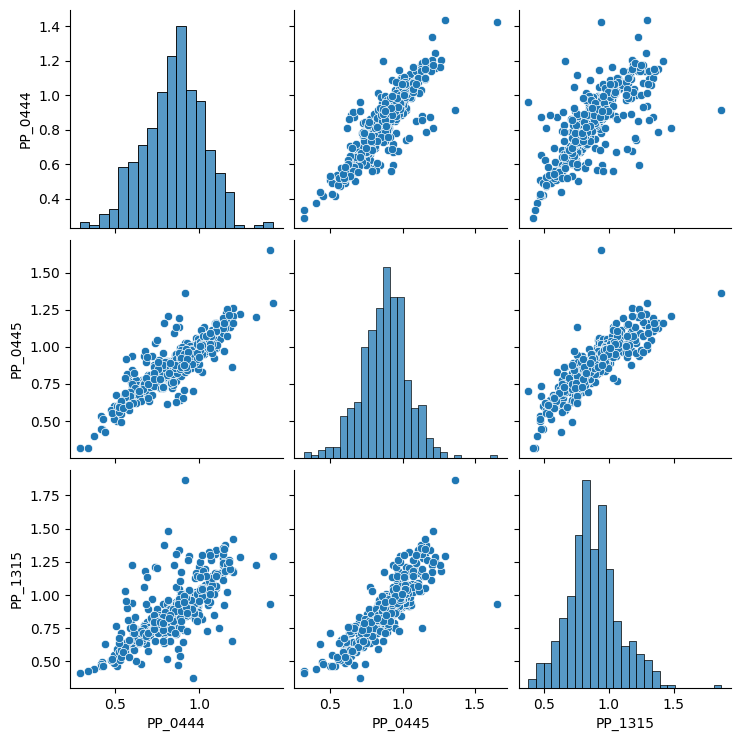

In [19]:
sns.pairplot(omics_mean_ribo.loc[:, large_ribo_gene_list[:3]])


In [20]:
# sns.pairplot(omics_mean_ribo.loc[:, large_ribo_gene_list])

In [21]:
# sns.pairplot(omics_mean_ribo.loc[:, small_ribo_gene_list])
# fig.suptitle('Small subunits')

In [22]:
from scipy.stats import pearsonr

In [23]:
small_corr = omics_mean_ribo.loc[:, small_ribo_gene_list].corr()
small_corr = small_corr.where(np.triu(np.ones(small_corr.shape), k = 1).astype(bool))
small_corr_stack = small_corr.stack().reset_index()
small_corr_stack.columns = ['Row','Column','Value']
small_corr_stack['subunit_type'] = 'Small'

large_corr = omics_mean_ribo.loc[:, large_ribo_gene_list].corr()
large_corr = large_corr.where(np.triu(np.ones(large_corr.shape), k = 1).astype(bool))
large_corr_stack = large_corr.stack().reset_index()
large_corr_stack.columns = ['Row','Column','Value']
large_corr_stack['subunit_type'] = 'Large'

corr_df = pd.concat([small_corr_stack, large_corr_stack])

Text(0.5, 0, 'Pearson Corr b/w two ribosomal subunits')

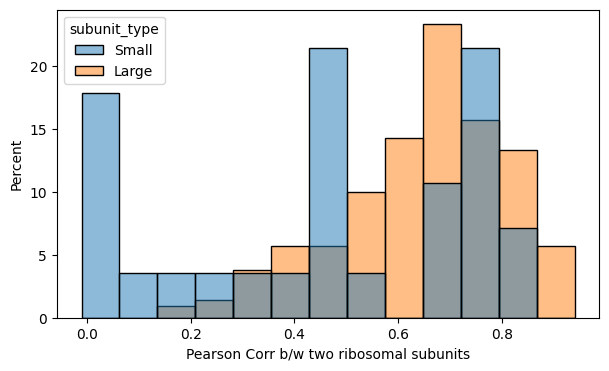

In [24]:
fig, ax = plt.subplots(figsize = (7, 4))
sns.histplot(data = corr_df, x = 'Value', hue = 'subunit_type', stat = 'percent', common_norm = False)
ax.set_xlabel('Pearson Corr b/w two ribosomal subunits')

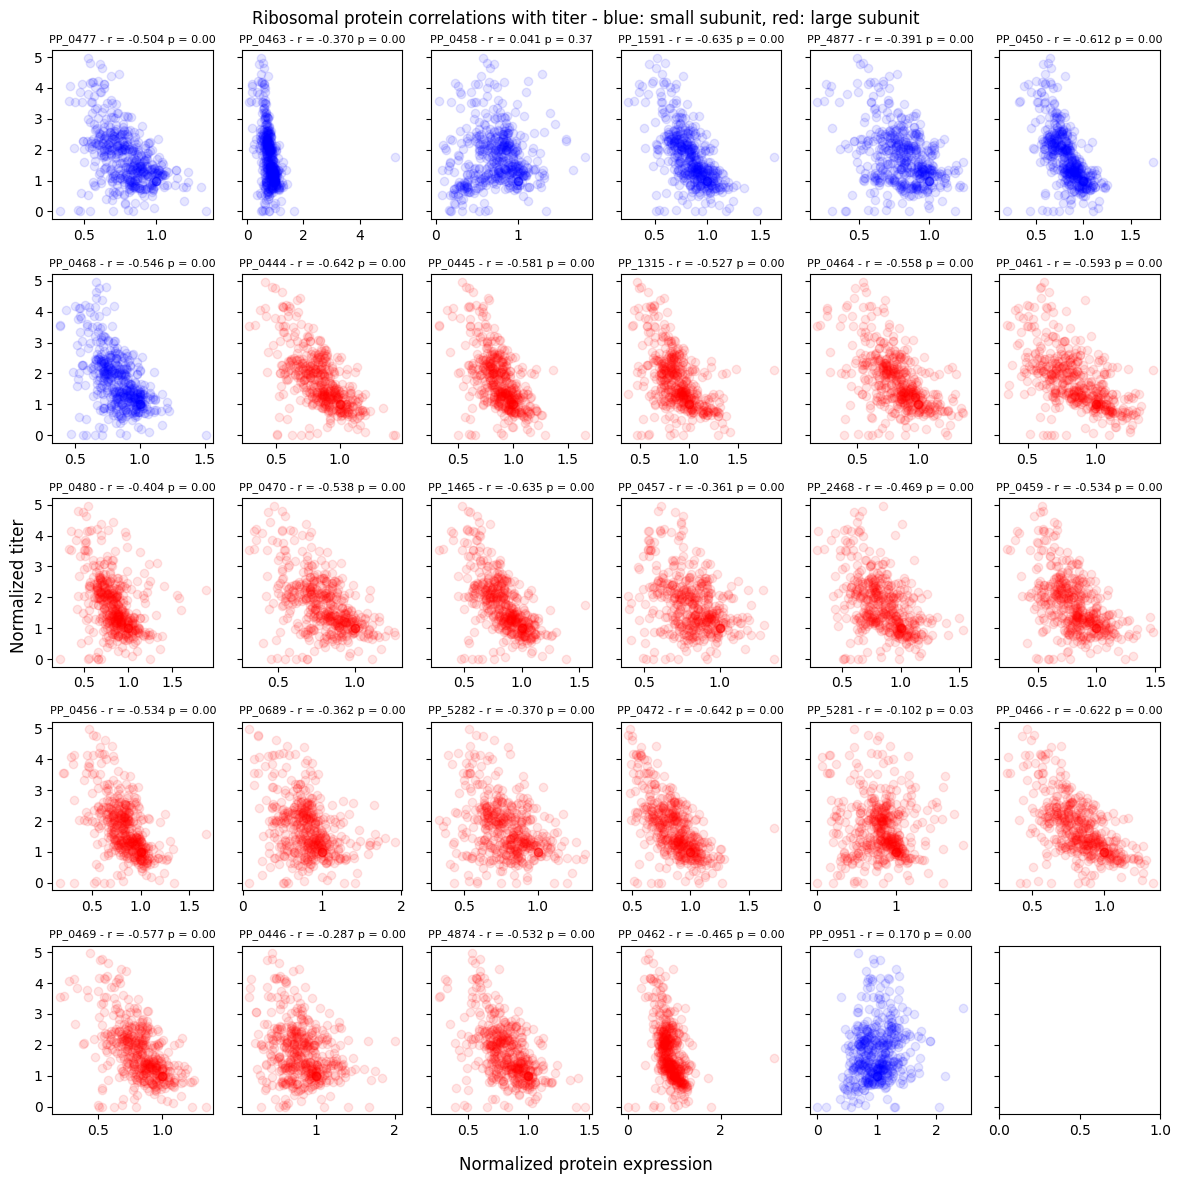

In [25]:
fig, ax = plt.subplots(5, 6, figsize = (12, 12), sharex = False, sharey = True)
large_ribo_gene_list
for i, (a, c) in enumerate(zip(fig.get_axes(), ribo_prot_gene_list)):
    if c in large_ribo_gene_list:
        scatter_color = 'r'
    if c in small_ribo_gene_list:
        scatter_color = 'b'
    x = omics_mean_ribo[c].values
    y = omics_mean_ribo['isoprenol'].values
    a.scatter(x, y,  alpha = 0.1, c = scatter_color)
    pr = pearsonr(x, y)
    title_text = f'{c} - r = {pr.statistic:.3f} p = {pr.pvalue:.2f}'
    a.set_title(title_text, fontsize = 8)
fig.supxlabel('Normalized protein expression')
fig.supylabel('Normalized titer')
fig.suptitle('Ribosomal protein correlations with titer - blue: small subunit, red: large subunit')
fig.tight_layout()

In [26]:
omics_mean_ribo

,PP_0444,PP_0445,PP_0446,PP_0450,PP_0456,PP_0457,PP_0458,PP_0459,PP_0461,PP_0462,...,PP_0951,PP_1315,PP_1465,PP_1591,PP_2468,PP_4874,PP_4877,PP_5281,PP_5282,isoprenol
line_name,,,,,,,,,,,,,,,,,,,,,
Control_c0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5335_c0,0.784145,0.731281,0.565185,0.781478,0.732316,0.714438,0.452494,0.667275,0.868316,0.817404,...,0.860467,0.793229,0.768557,0.776814,0.658697,0.752078,0.538974,0.669843,0.661771,1.246390
PP_5416_c0,0.603049,0.621752,0.316435,0.714437,0.622079,0.502448,0.265303,0.535522,0.700351,0.678006,...,0.798820,0.756603,0.588548,0.727029,0.646414,0.483586,0.641834,0.530923,0.492311,0.871439
PP_5417_c0,0.818413,0.821017,0.929866,0.828746,0.836404,0.720958,0.478286,0.755049,0.876088,0.930935,...,1.091930,0.824568,0.868419,0.810865,0.766396,0.806480,0.624045,0.873122,0.629111,1.177884


In [27]:
HETEROLOGOUS_PROTEIN_LIST_ABUNDANCE = [
     'EF_1364',
     'MM_1762',
     'SPy_1046',
     'YNR043W',
     'aacC1',
     'b4055 JW4015',
     'mvaS',
     'neo'
]

In [28]:
non_pp_columns = [c for c in omics_mean.columns if c[:2] !='PP']

In [29]:
omics_df_het = omics_mean[non_pp_columns]

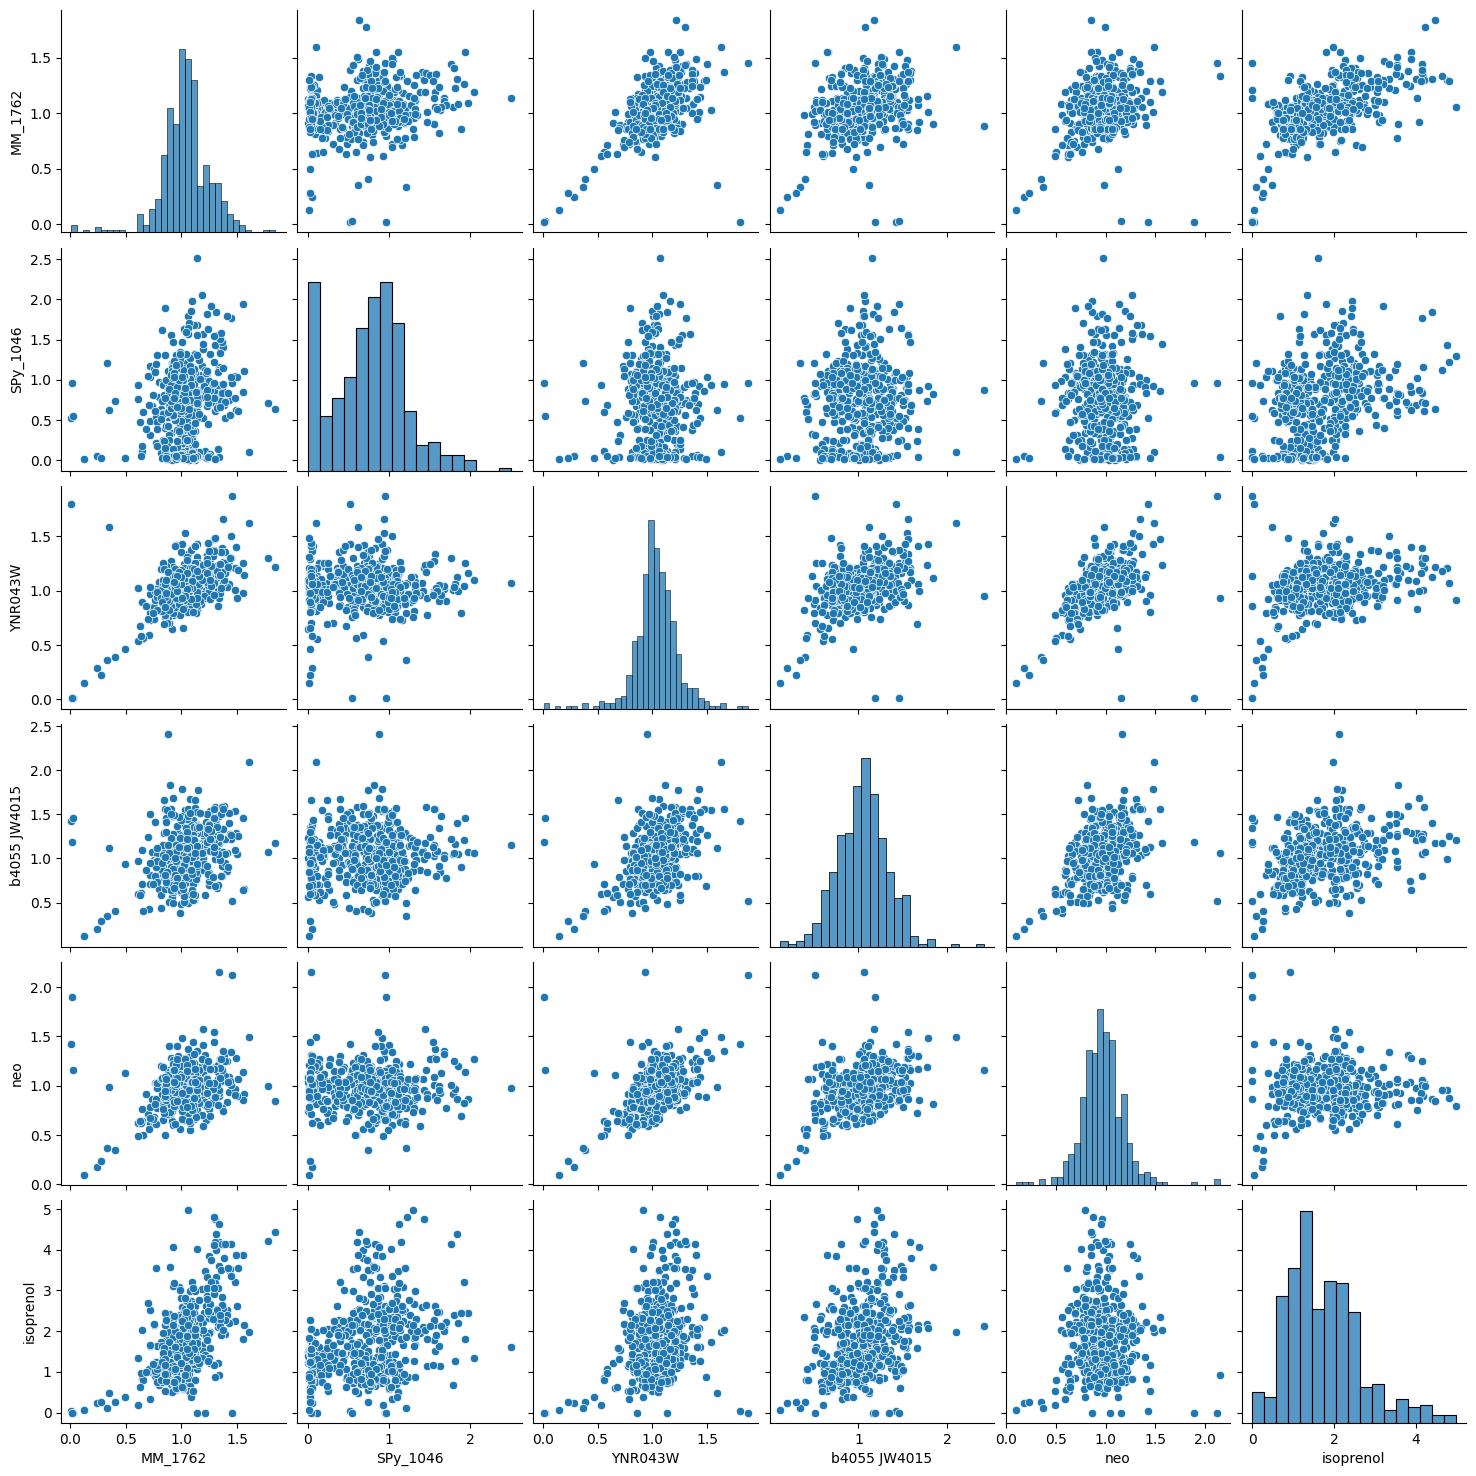

In [30]:
omics_df_het
sns.pairplot(omics_df_het[omics_df_het['MM_1762']<3])

In [31]:
omics_mean_ribo

,PP_0444,PP_0445,PP_0446,PP_0450,PP_0456,PP_0457,PP_0458,PP_0459,PP_0461,PP_0462,...,PP_0951,PP_1315,PP_1465,PP_1591,PP_2468,PP_4874,PP_4877,PP_5281,PP_5282,isoprenol
line_name,,,,,,,,,,,,,,,,,,,,,
Control_c0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5335_c0,0.784145,0.731281,0.565185,0.781478,0.732316,0.714438,0.452494,0.667275,0.868316,0.817404,...,0.860467,0.793229,0.768557,0.776814,0.658697,0.752078,0.538974,0.669843,0.661771,1.246390
PP_5416_c0,0.603049,0.621752,0.316435,0.714437,0.622079,0.502448,0.265303,0.535522,0.700351,0.678006,...,0.798820,0.756603,0.588548,0.727029,0.646414,0.483586,0.641834,0.530923,0.492311,0.871439
PP_5417_c0,0.818413,0.821017,0.929866,0.828746,0.836404,0.720958,0.478286,0.755049,0.876088,0.930935,...,1.091930,0.824568,0.868419,0.810865,0.766396,0.806480,0.624045,0.873122,0.629111,1.177884


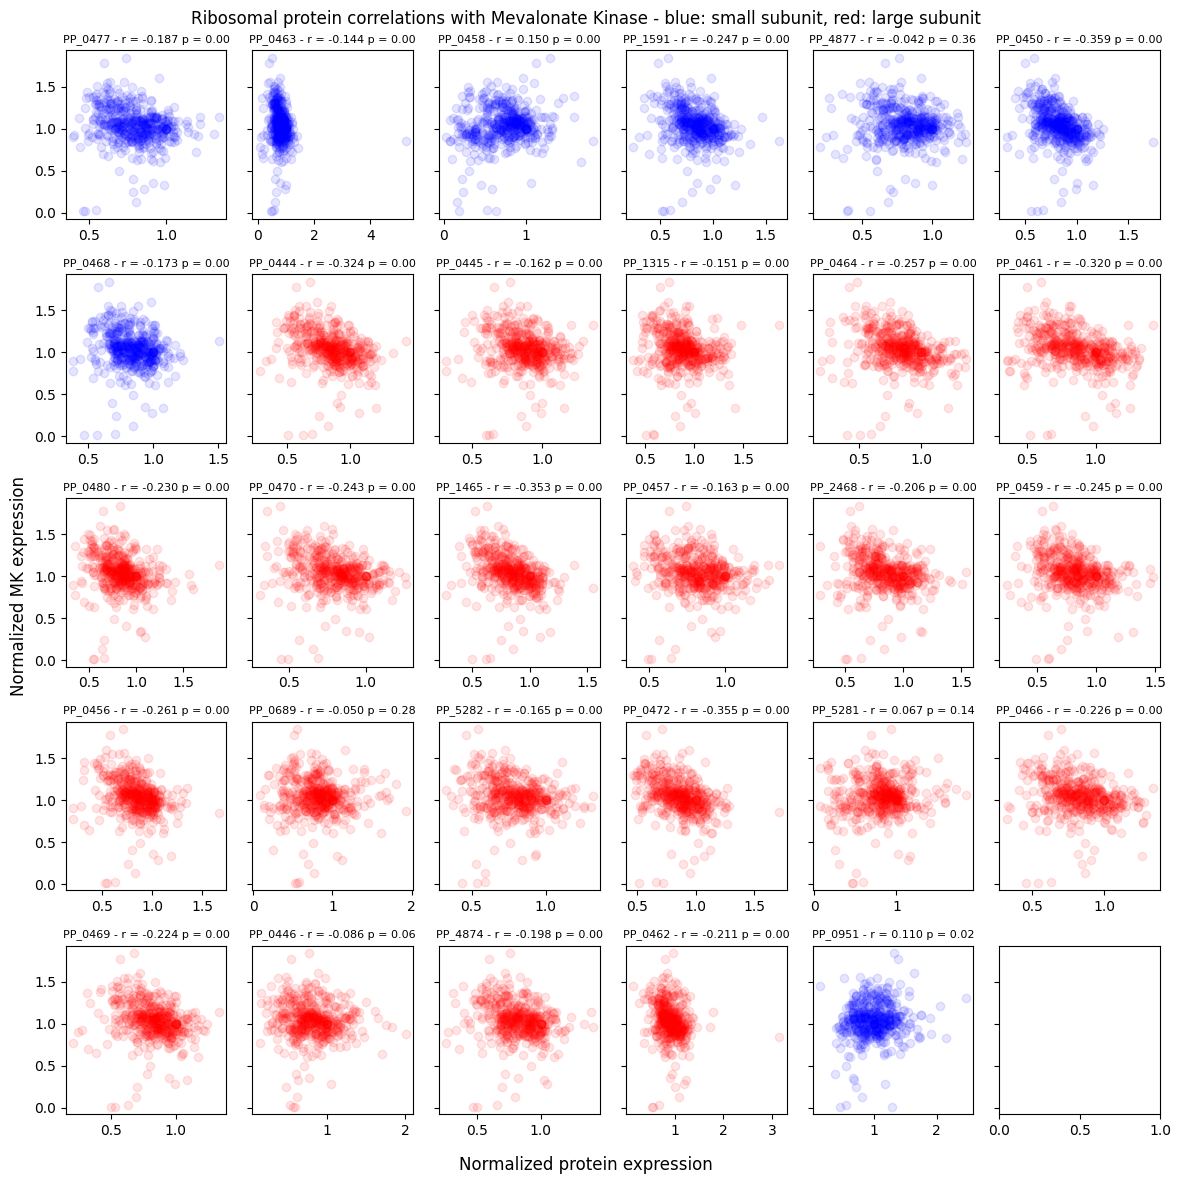

In [32]:
fig, ax = plt.subplots(5, 6, figsize = (12, 12), sharex = False, sharey = True)
large_ribo_gene_list
for i, (a, c) in enumerate(zip(fig.get_axes(), ribo_prot_gene_list)):
    if c in large_ribo_gene_list:
        scatter_color = 'r'
    if c in small_ribo_gene_list:
        scatter_color = 'b'
    
    x = omics_mean_ribo.loc[omics_mean['MM_1762']<3, c].values
    y = omics_mean.loc[omics_mean['MM_1762']<3, 'MM_1762'].values
    a.scatter(x, y,  alpha = 0.1, c = scatter_color)
    pr = pearsonr(x, y)
    title_text = f'{c} - r = {pr.statistic:.3f} p = {pr.pvalue:.2f}'
    a.set_title(title_text, fontsize = 8)
fig.supxlabel('Normalized protein expression')
fig.supylabel('Normalized MK expression')
fig.suptitle('Ribosomal protein correlations with Mevalonate Kinase - blue: small subunit, red: large subunit')
fig.tight_layout()

In [33]:
np.arange(0, 60, 10)

array([ 0, 10, 20, 30, 40, 50])

In [34]:
df_to_check= omics_mean_ribo[['PP_0444', 'isoprenol']]
N_TO_CHECK = 10
df_to_check = df_to_check[df_to_check['isoprenol']>0]
check_idx = np.linspace(0, len(df_to_check)-1, N_TO_CHECK).astype(int)
iso_check_vals = np.linspace(np.percentile(df_to_check['isoprenol'], 10), np.percentile(df_to_check['isoprenol'], 98), N_TO_CHECK)
check_strains = []
for v in iso_check_vals:
    print(v)
    srs = np.abs(df_to_check['isoprenol'] - v)
    check_strains.append(srs.idxmin())
    # check_strains.append(np.abs(df_to_check['isoprenol']-v))
check_idx
df_to_check = df_to_check.loc[check_strains,:]

0.788279137896798
1.1616138139438372
1.5349484899908767
1.9082831660379158
2.2816178420849553
2.6549525181319944
3.028287194179034
3.401621870226073
3.7749565462731125
4.148291222320152


In [35]:
df_to_check.to_csv('strains_to_check_for_ribo_content.csv')

In [36]:
df_to_check

,PP_0444,isoprenol
line_name,,
PP_3123_PP_5288_c1,1.155114,0.790048
PP_1506_PP_1769_c3,0.750237,1.162528
PP_0368_PP_4191_PP_4192_c1,0.974837,1.536365
PP_0813_PP_1769_PP_4189_c3,0.905345,1.907777
PP_0751_PP_0814_PP_4191_c4,0.897102,2.285085
PP_0528_PP_0751_PP_0814_c4,0.805718,2.662801
PP_0751_PP_0815_PP_4189_c5,0.728146,3.019731
PP_0815_PP_4191_c6,0.560031,3.344248
PP_0528_PP_0815_c4,0.493088,3.791392


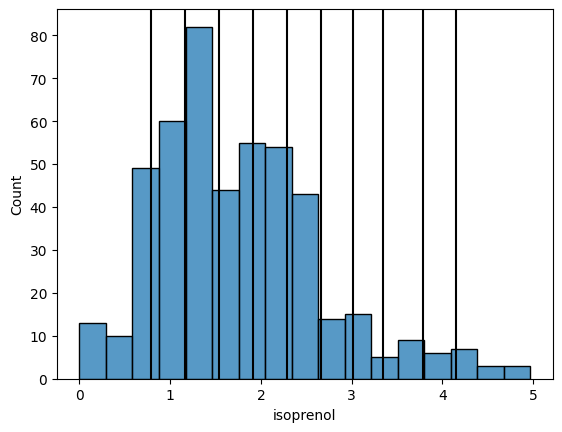

In [37]:
fig, ax = plt.subplots()
sns.histplot(omics_mean_ribo['isoprenol'])
for x in df_to_check['isoprenol'].values:
    ax.axvline(x, c = 'k')

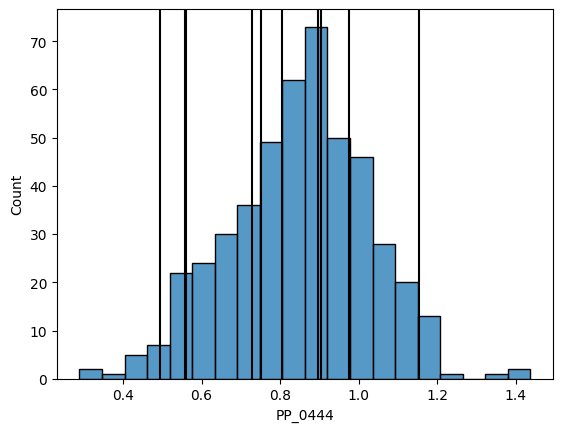

In [38]:
fig, ax = plt.subplots()
sns.histplot(omics_mean_ribo['PP_0444'])
for x in df_to_check['PP_0444'].values:
    ax.axvline(x, c = 'k')

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
ribo_data = omics_mean_ribo.drop(columns='isoprenol')
ss=StandardScaler()
ribo_data_std = ss.fit_transform(X=ribo_data.values)
pca = PCA(n_components = 3).fit(ribo_data_std)

In [41]:
pca.explained_variance_ratio_

array([0.63445941, 0.07110496, 0.05222045])

In [42]:
pca_trans = pca.transform(ribo_data_std)


In [43]:
pca_trans

array([[ 4.7732431 ,  0.55183921, -0.43440427],
       [ 4.7732431 ,  0.55183921, -0.43440427],
       [ 4.7732431 ,  0.55183921, -0.43440427],
       ...,
       [-1.13874272, -0.06929027,  0.87674981],
       [-7.32620285,  0.84487103,  1.59121113],
       [-8.73911168, -2.22166305,  0.39583041]])

In [44]:
ribo_data

,PP_0444,PP_0445,PP_0446,PP_0450,PP_0456,PP_0457,PP_0458,PP_0459,PP_0461,PP_0462,...,PP_0689,PP_0951,PP_1315,PP_1465,PP_1591,PP_2468,PP_4874,PP_4877,PP_5281,PP_5282
line_name,,,,,,,,,,,,,,,,,,,,,
Control_c0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Control_c4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5335_c0,0.784145,0.731281,0.565185,0.781478,0.732316,0.714438,0.452494,0.667275,0.868316,0.817404,...,0.682359,0.860467,0.793229,0.768557,0.776814,0.658697,0.752078,0.538974,0.669843,0.661771
PP_5416_c0,0.603049,0.621752,0.316435,0.714437,0.622079,0.502448,0.265303,0.535522,0.700351,0.678006,...,0.461522,0.798820,0.756603,0.588548,0.727029,0.646414,0.483586,0.641834,0.530923,0.492311
PP_5417_c0,0.818413,0.821017,0.929866,0.828746,0.836404,0.720958,0.478286,0.755049,0.876088,0.930935,...,0.770484,1.091930,0.824568,0.868419,0.810865,0.766396,0.806480,0.624045,0.873122,0.629111


<Axes: xlabel='pca1', ylabel='isoprenol'>

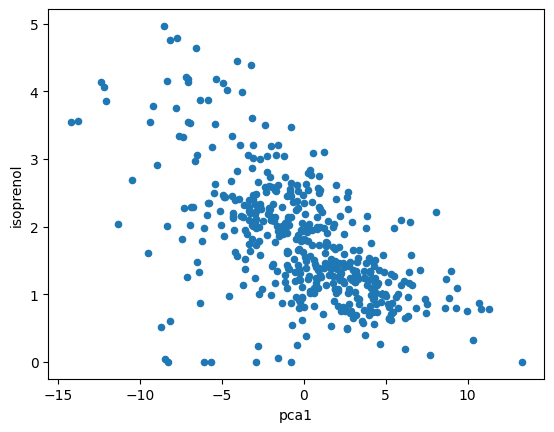

In [45]:
pca_df = pd.DataFrame.from_dict(
    {
        'idx': ribo_data.index,
        'pca1': pca_trans[:,0],
        'isoprenol': omics_mean_ribo['isoprenol']
    }
).set_index('idx')
pca_df = pca_df.sort_values('pca1')
pca_df.plot.scatter('pca1', 'isoprenol')

## Random analysis

<Axes: xlabel='cycle', ylabel='PP_4651'>

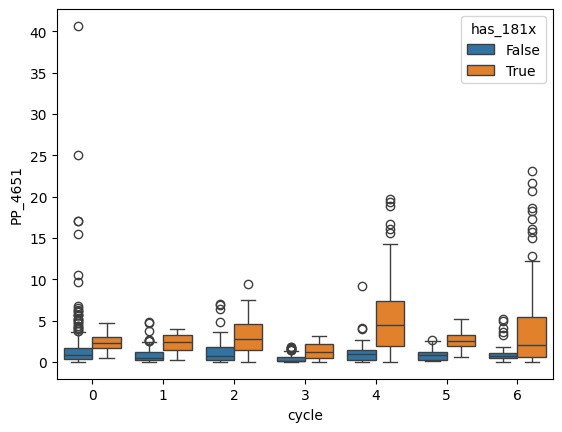

In [46]:
omics_copy = omics.copy(deep = True)
omics_copy['has_181x'] = ['081' in x for x in omics_copy.index]
omics_copy['cycle'] = [int(x[-1]) for x in omics_copy.index]
sns.boxplot(data = omics_copy, y = 'PP_4651', x = 'cycle', hue = 'has_181x')

<Axes: xlabel='cycle', ylabel='count'>

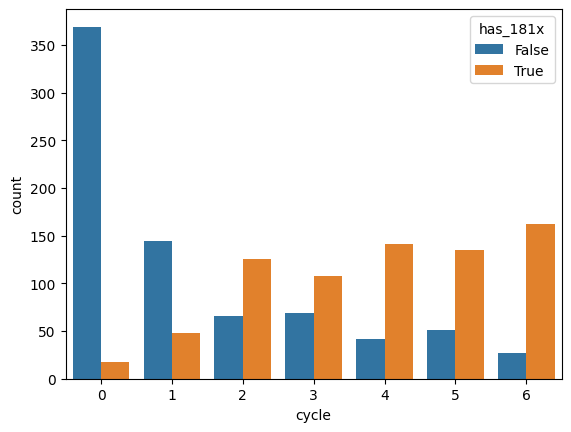

In [47]:
sns.countplot(data = omics_copy, x = 'cycle', hue = 'has_181x')

(-2.0, 15.0)

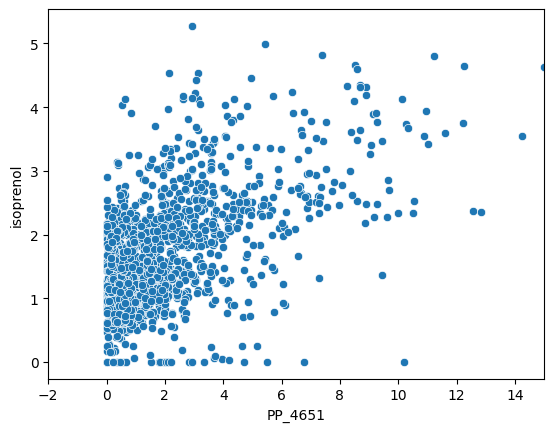

In [48]:
sns.scatterplot(data = omics, x = 'PP_4651', y = 'isoprenol')
plt.gca().set_xlim([-2, 15])

<Axes: ylabel='PP_4651'>

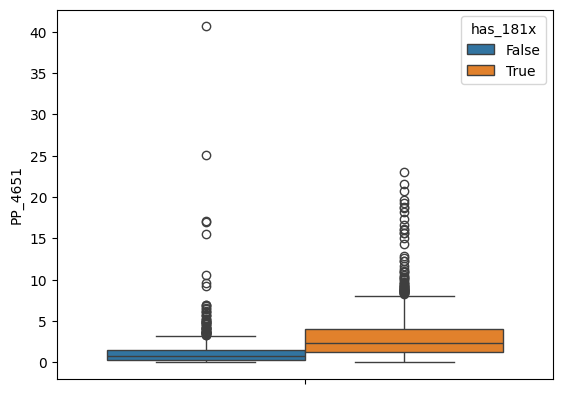

In [49]:
sns.boxplot(data = omics_copy, y = 'PP_4651', hue = 'has_181x')

### Look at terminal oxidases
Proteins to look at:
- PP_4561/cioA
- Cytochrome bo3 terminal oxidase/CyoA-D/PP_0812-5

From paper:
- bo3 type oxidase (e coli cyo) - CyoA-D
- cyanide insensitive oxidase (CIO, e coli cyd) - CioA/B
- bc1 complex, which transfers e- to cytochrome c, which can be oxidized by aa3 oxidase or cbb3 oxidases
  - aa3 oxidase PP_0103/4/6
  - cbb3-1 oxidase CcoN/P/Q/O-I - PP_4250-3
  - cbb3-2 oxidase CcoN/P/Q/O-II - PP_4255-8
  

In [50]:
cio = ['PP_4651']
cyo = [f'PP_081{x}' for x in [2, 3, 4, 5]]
aa3 = [f'PP_010{x}' for x in [3, 4, 6]]
cbb31 = [f'PP_425{x}' for x in [0, 1, 2, 3]]
cbb32 = [f'PP_425{x}' for x in [5, 6, 7, 8]]

In [51]:
all_term_oxidases = cio + cyo + aa3 + cbb31 + cbb32
measured_oxidases = [oxidase for oxidase in all_term_oxidases if oxidase in omics_copy.columns]
measured_oxidases

['PP_4651',
 'PP_0812',
 'PP_0813',
 'PP_4251',
 'PP_4253',
 'PP_4255',
 'PP_4256',
 'PP_4258']

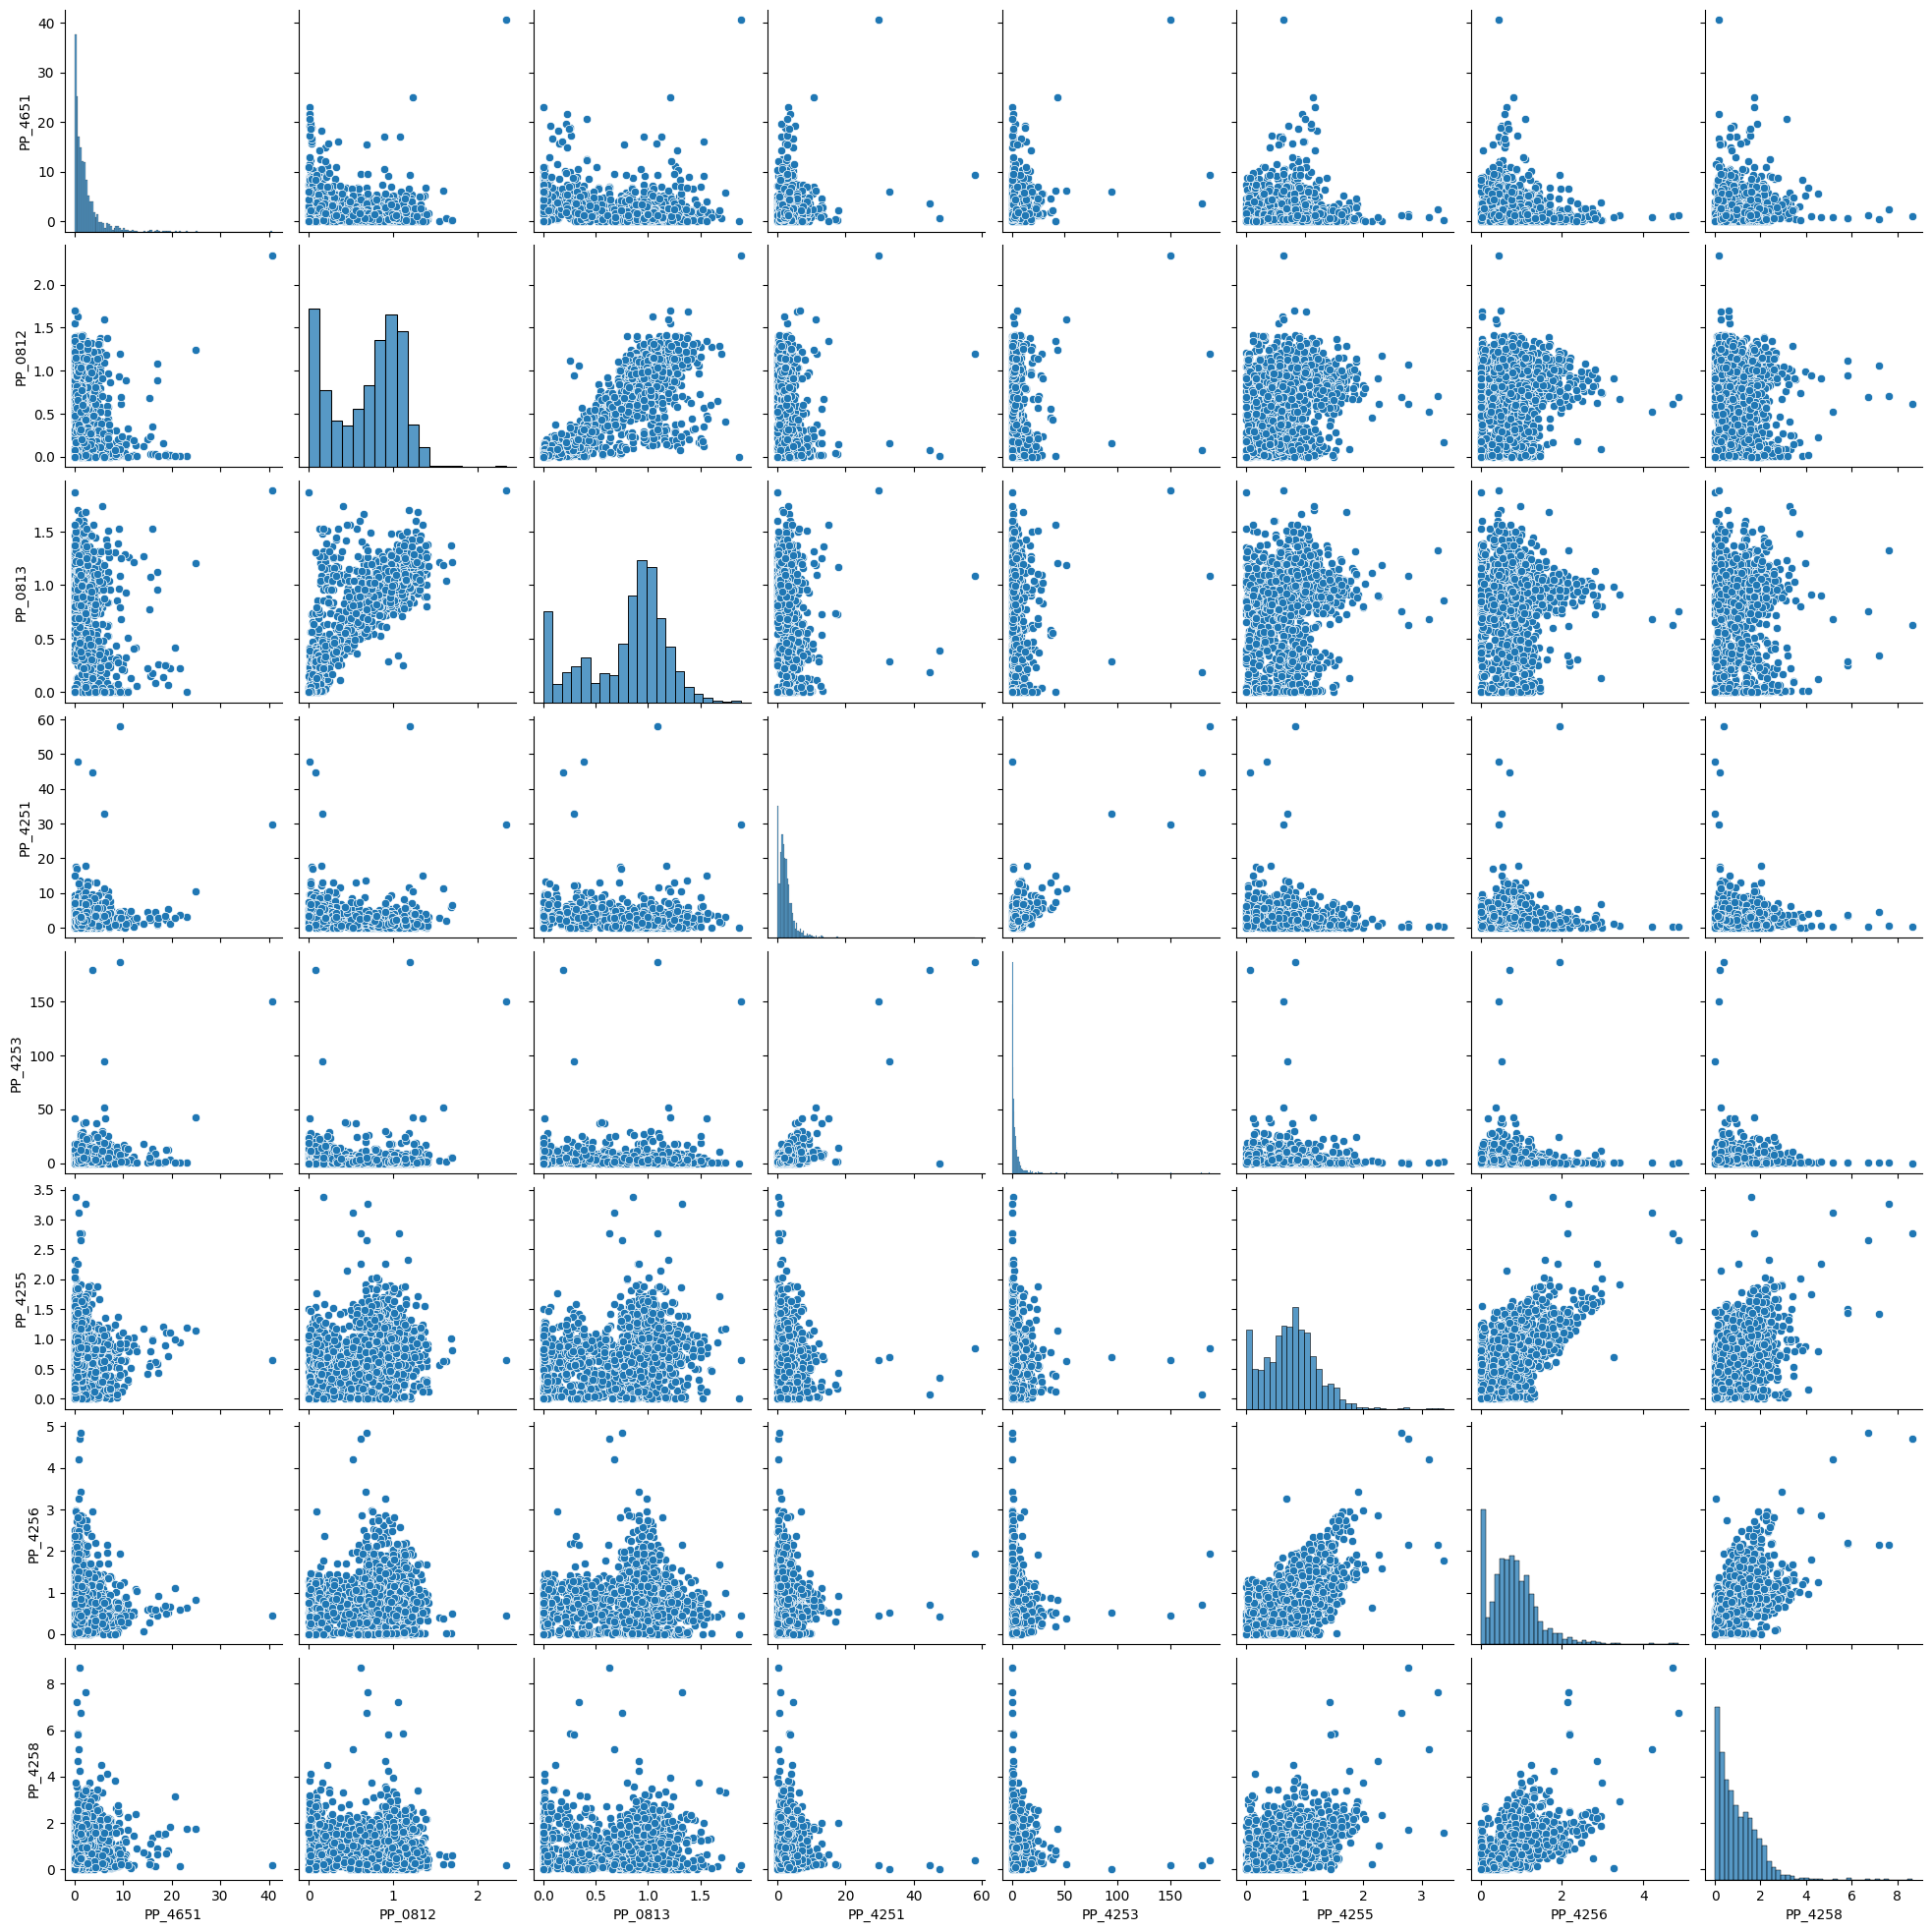

In [52]:
sns.pairplot(
    data = omics_copy.loc[:, measured_oxidases],
)

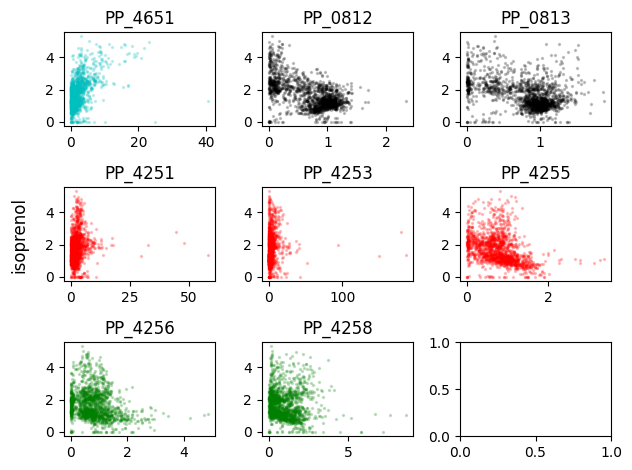

In [53]:
ox_colors = ['c', 'k', 'k', 'r', 'r', 'r', 'g', 'g']
fig, ax = plt.subplots(3, 3)
for a, mo, ox_color in zip(fig.get_axes(), measured_oxidases, ox_colors):
    a.scatter(omics_copy.loc[:, mo], omics_copy.loc[:, 'isoprenol'], c = ox_color, s = 2, alpha = 0.2)
    a.set_title(mo)

fig.supylabel('isoprenol')
fig.tight_layout()


In [57]:
omics_copy['isoprenol']

line_name_rep_cycle
Control-R10_c0    1.024392
Control-R11_c0    1.120367
Control-R12_c0    1.178920
Control-R13_c0    0.720284
Control-R14_c0    1.030501
                    ...   
PP_5419-R2_c0     2.153361
PP_5419-R3_c0     2.397354
PP_5420-R1_c0     0.484521
PP_5420-R2_c0     0.527125
PP_5420-R3_c0     0.556424
Name: isoprenol, Length: 1506, dtype: float64

In [60]:
oc2 = omics_copy.copy(deep = True)

In [65]:
oc2['has_0815'] = ['PP_0815' in x for x in oc2.index]

<Axes: xlabel='PP_0977', ylabel='isoprenol'>

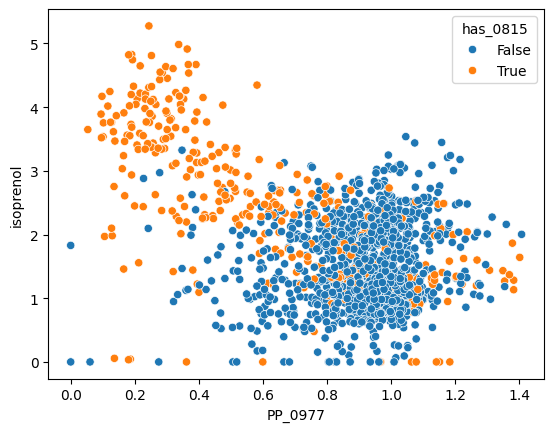

In [66]:
sns.scatterplot(data = oc2, x = 'PP_0977', y = 'isoprenol', hue = 'has_0815')

## Import top3 data

In [54]:
data_loc = './data/full_top3_data/'
top3_files = [f'{data_loc}DBTL{i}.csv' for i in range(7)]
top3_files

dfs = []
for f in top3_files:
    dfs.append(pd.read_csv(f))
top3_df = pd.concat(dfs)


In [55]:
top3_df.head()

,Protein.Group,Protein.Names,Protein,Protein.Description,Sample,Replicate,Top_3pep_counts_mean,%_of protein_abundance_Top3-method,log10_%_abundance,Cycle
0,P00552,KKA2_KLEPN,Neo,Aminoglycoside 3'-phosphotransferase,Control,R1,119112382.0,3.112624,0.493127,0
1,P00552,KKA2_KLEPN,Neo,Aminoglycoside 3'-phosphotransferase,Control,R2,149172095.3,3.712705,0.569690,0
2,P00552,KKA2_KLEPN,Neo,Aminoglycoside 3'-phosphotransferase,Control,R3,138700868.7,3.700489,0.568259,0
3,P00552,KKA2_KLEPN,Neo,Aminoglycoside 3'-phosphotransferase,Control,R4,100306326.3,2.650788,0.423375,0
4,P00552,KKA2_KLEPN,Neo,Aminoglycoside 3'-phosphotransferase,Control,R5,114276780.7,2.835433,0.452619,0
